In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [2]:
a=pd.read_csv('/home/abhinav/Downloads/covid.csv')
a.shape
a.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
a.drop(['new_deaths_smoothed','new_cases_smoothed'],axis=1,inplace=True)

In [4]:
a.rename(columns={'date':'Date','location':'Location','continent':'Continent','iso_code':'ISO_code'},inplace=True)
a.head()

,ISO_code,Continent,Location,Date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.125,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.125,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.125,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.125,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.125,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
continent_unique=list(a.Continent.unique())
print(continent_unique)

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']


In [11]:
imputer=SimpleImputer(strategy='constant')
a1=pd.DataFrame(imputer.fit_transform(a),columns=a.columns)

In [24]:
data=a.groupby(['Date','Location']) [['Date','Location','total_cases','total_deaths','total_vaccinations']].sum().reset_index()

In [25]:
data

,Date,Location,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,0.0,0.000000e+00
1,2020-01-01,Mexico,0.0,0.0,0.000000e+00
2,2020-01-02,Argentina,0.0,0.0,0.000000e+00
3,2020-01-02,Mexico,0.0,0.0,0.000000e+00
4,2020-01-03,Argentina,0.0,0.0,0.000000e+00
...,...,...,...,...,...
211361,2022-08-25,Wallis and Futuna,761.0,7.0,0.000000e+00
211362,2022-08-25,World,599293387.0,6481405.0,1.252028e+10
211363,2022-08-25,Yemen,11922.0,2155.0,0.000000e+00
211364,2022-08-25,Zambia,332710.0,4016.0,0.000000e+00


In [26]:
# find total countries where total_deaths is greater than 1000000 ?

data1=data.loc[(data['total_deaths']>1000000)]
countries=data1['Location'].unique()
qus=list(data1.Location.unique())
qus

['World',
 'High income',
 'Upper middle income',
 'Europe',
 'South America',
 'Asia',
 'Lower middle income',
 'North America',
 'European Union',
 'United States']

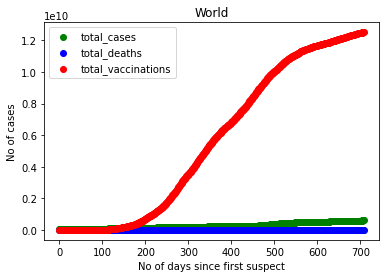

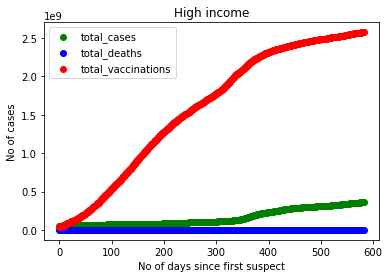

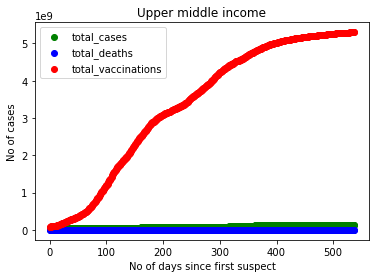

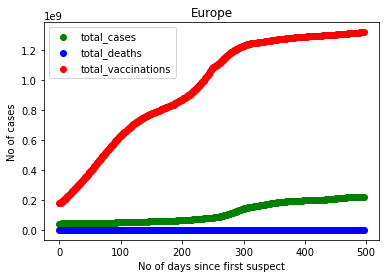

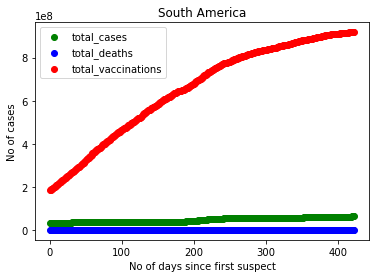

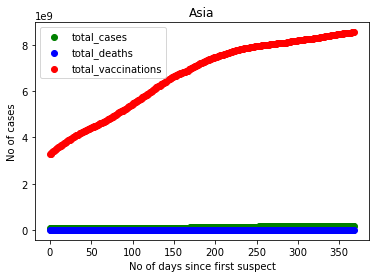

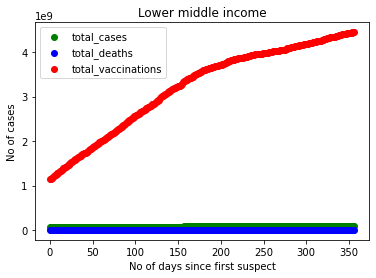

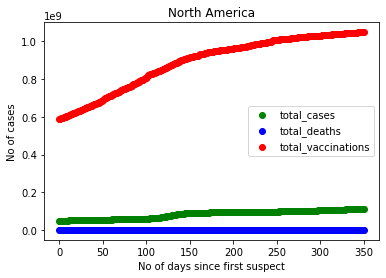

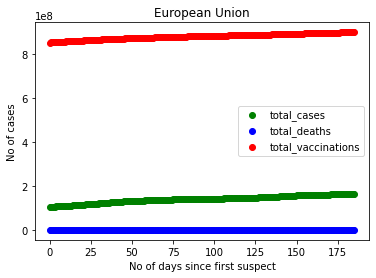

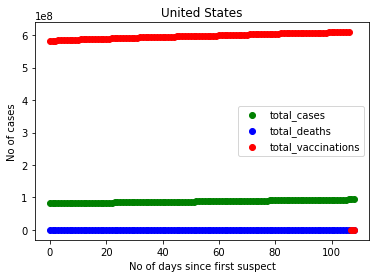

In [36]:
for idx in range(0,len(countries)):
    cdata = data1[data1['Location']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(cdata)),cdata['total_cases'],color='green',label='total_cases')
    plt.scatter(np.arange(0,len(cdata)),cdata['total_deaths'],color='blue',label='total_deaths')
    plt.scatter(np.arange(0,len(cdata)),cdata['total_vaccinations'],color='red',label='total_vaccinations')
    plt.title(countries[idx])
    plt.xlabel('No of days since first suspect')
    plt.ylabel('No of cases')
    plt.legend()
    plt.show()

In [37]:
 # we group countries
data5=data1.groupby(['Location']) [['Location','total_cases','total_deaths']].sum().reset_index()
data5

,Location,total_cases,total_deaths
0,Asia,4.322164e+10,4.842530e+08
1,Europe,5.752850e+10,7.479506e+08
2,European Union,2.604243e+10,2.014204e+08
3,High income,9.502330e+10,1.095145e+09
4,Lower middle income,2.799053e+10,4.388799e+08
5,North America,2.924031e+10,4.618589e+08
6,South America,2.013995e+10,5.145465e+08
7,United States,9.591880e+09,1.111513e+08
8,Upper middle income,4.796892e+10,1.105675e+09
9,World,1.886061e+11,3.022378e+09


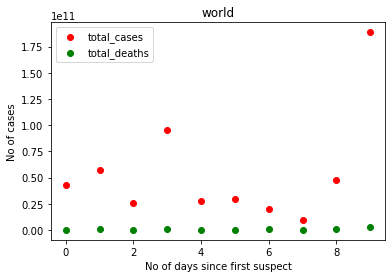

In [38]:
cdata=data5
plt.scatter(np.arange(0,len(cdata)),cdata['total_cases'],color='red',label='total_cases')
plt.scatter(np.arange(0,len(cdata)),cdata['total_deaths'],color='green',label='total_deaths')
plt.title('world')
plt.xlabel('No of days since first suspect')
plt.ylabel('No of cases')
plt.legend()
plt.show()

In [40]:
# find how many dates where total_deaths is greater than 1000000 ?

date=data1['Date'].unique()
len(date)

709

In [41]:
grp=data1.groupby(['Date']) [['Date','total_cases','total_deaths']].sum().reset_index()
grp

,Date,total_cases,total_deaths
0,2020-09-16,2.992935e+07,1004609.0
1,2020-09-17,3.024481e+07,1010258.0
2,2020-09-18,3.057141e+07,1016111.0
3,2020-09-19,3.086466e+07,1021380.0
4,2020-09-20,3.111979e+07,1025367.0
...,...,...,...
704,2022-08-21,2.018080e+09,21270546.0
705,2022-08-22,2.020527e+09,21274826.0
706,2022-08-23,2.023451e+09,21284668.0
707,2022-08-24,2.026156e+09,21294865.0


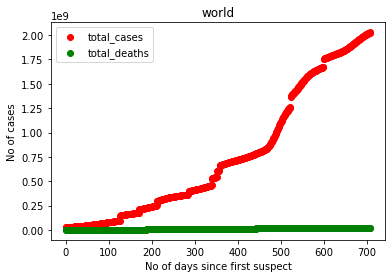

In [42]:
cdata=grp
plt.scatter(np.arange(0,len(cdata)),cdata['total_cases'],color='red',label='total_cases')
plt.scatter(np.arange(0,len(cdata)),cdata['total_deaths'],color='green',label='total_deaths')
plt.title('world')
plt.xlabel('No of days since first suspect')
plt.ylabel('No of cases')
plt.legend()
plt.show()